In [1]:
get_ipython().magic('matplotlib inline')
import ee; ee.Initialize()

In [63]:
get_ipython().magic('matplotlib inline')

# read a FeatureCOllection from a fusion table
# loop 
import ee; ee.Initialize()
from IPython.display import Image




# var ___sentinel = ee.ImageCollection("COPERNICUS/S2")
vizParams = {'min': 0,  'max': 4000, 'gamma': [0.45, 0.6, 1]}

sentinel_img = ee.ImageCollection("COPERNICUS/S2").filterDate('2015-8-1', '2015-9-1').median()
# print(sentinel_img.getInfo())
point = ee.Geometry.Point(31.1407, 30.7796)
point = ee.Geometry.Point(9.867186294914656, 36.32724571345013)
region = point.buffer(40000).bounds().getInfo()['coordinates']
print(region)
url=sentinel_img.getThumbUrl({'bands': 'B8,B4,B3', 'region': region, 'min': 0,  'max': 4000})
print(url)
# im = Image(url=sentinel_img.getThumbUrl({'bands': 'B8,B4,B3', 'region': region, 'min': 0,  'max': 4000}))

# # from io import BytesIO
# # data = BytesIO(urllib.request.urlopen(l8_image.getThumbUrl({'region':region_california})).read())


# print(dir(im))
# print(im.__dict__)
# import requests
# req = requests.get(im.url)
# with open('test.png','wb') as f:
#     f.write(req.content)
    
# print(sentinel_img.getThumbUrl({'bands': 'B8,B4,B3', 'region': region, 'min': 0,  'max': 4000}))

# for point in points:
#     region = point.buffer(40000).bounds().getInfo()['coordinates']
    
#     url = (sentinel_img.getThumbUrl({'bands': 'B8,B4,B3', 'region': region, 'min': 0,  'max': 4000}))
#     Image(url=sentinel_img.getThumbUrl({'bands': 'B8,B4,B3', 'region': region, 'min': 0,  'max': 4000}))
    
    

    

# Map.addLayer(collection, vizParams, 'Sentinel-2', 1);

[[[9.424296827454171, 35.96742876898804], [10.311947942447642, 35.96742876898804], [10.311947942447642, 36.68720035150941], [9.424296827454171, 36.68720035150941], [9.424296827454171, 35.96742876898804]]]
https://earthengine.googleapis.com//api/thumb?thumbid=599bec20d69118611b26db35e2bfa285&token=2b373762ea91ee08759999a448295993


https://earthengine.googleapis.com//api/thumb?thumbid=bb508515ed947da713b28942ab238981&token=0264a4a6f87681894aa314e82daabcf7


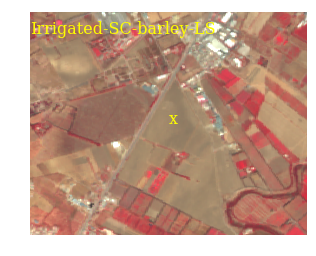

In [4]:
get_ipython().magic('matplotlib inline')
import csv, itertools, requests
import urllib.request
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from io import BytesIO
import ee; ee.Initialize()
sentinel_img = ee.ImageCollection("COPERNICUS/S2").filterDate('2015-8-1', '2015-9-1').median()
font = {'family': 'serif',
        'color':  'yellow',
        'weight': 'normal',
        'size': 16,
        }
def everyrow(row):
    lat, lon = float(row["Latitude"]), float(row["Longitude"])
    oname = "%s-%s.png" % (row["id"], row["croptype"].replace('/', '-'))
    point = ee.Geometry.Point(lon, lat)
    region = point.buffer(1000).bounds().getInfo()['coordinates']
    url = sentinel_img.getThumbUrl({'bands': 'B8,B4,B3', 'region': region, 'min': 0,  'max': 4000, 'format':'png'})
    print(url)
    data = BytesIO(urllib.request.urlopen(url).read())

    image = plt.imread(data)  # crash on py3.x
    ax = plt.imshow(image)
    plt.axis('off')
    plt.text(256,207,'x', fontdict=font)
    plt.text(0,40, row["desc"] , fontdict=font)
#     plt.savefig(oname)

# map(everyrow, csv.DictReader(open("TUN-sample-info.csv")))
for row in csv.DictReader(open("TUN-sample-info.csv")):
    everyrow(row)
    break
# list(map(everyrow, itertools.islice(csv.DictReader(open("TUN-sample-info.csv")),1)))

In [46]:
import csv, itertools
import requests
count = 0
map(maptest, foos)
sentinel_img = ee.ImageCollection("COPERNICUS/S2").filterDate('2015-8-1', '2015-9-1').median()
for row in csv.DictReader(open("TUN-sample-info.csv")):
    lat, lon = float(row["Latitude"]), float(row["Longitude"])
    oname = "%s-%s.png" % (row["id"], row["croptype"].replace('/', '-'))
    point = ee.Geometry.Point(lon, lat)
    region = point.buffer(1000).bounds().getInfo()['coordinates']
#     print(region)
    
    url = sentinel_img.getThumbUrl({'bands': 'B8,B4,B3', 'region': region, 'min': 0,  'max': 4000})
#     print(url)
    req = requests.get(url)
    with open(oname,'wb') as f:
        f.write(req.content)
    print(oname)
    count += 1
    if count > 2:
        break
#     print(lat, lon)
    

1-Barley-Wheat.png
2-Barley-Wheat.png
3-Barley-Wheat.png


In [33]:
from datetime import datetime, timedelta
def getPeriods(begin, end, length):
	begin = datetime.strptime(begin, '%Y-%m-%d')
	end = datetime.strptime(end, '%Y-%m-%d')
	dates = []
	while(begin < end):
		dates.append(ee.Date(begin))
		begin = begin + timedelta(days=length)
	return ee.List(dates);

PERIOD_LENGTH = 15; START = '2015-8-01';  END = '2015-9-01'
print(getPeriods(START, END, PERIOD_LENGTH))

ee.List([
  {
    "functionName": "Date",
    "type": "Invocation",
    "arguments": {
      "value": 1438387200000
    }
  },
  {
    "functionName": "Date",
    "type": "Invocation",
    "arguments": {
      "value": 1439683200000
    }
  },
  {
    "functionName": "Date",
    "type": "Invocation",
    "arguments": {
      "value": 1440979200000
    }
  }
])


In [27]:
tips = sns.load_dataset("tips")
tips[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# def getv(reduce, field, index): # get as field
#     fc = reduce.getInfo()['features']
#     value = [feature['properties'][field] for feature in fc]
#     index = [feature['properties'][index] for feature in fc]    
#     df = pd.DataFrame(get_value(fc, 'sum'), index=get_value(fc, 'country'))
#     df = df.sort_index()
#     return df
# profile
cols = 'T01.T02.T03.T04.T05.T06.T07.T08.T09.T10.T11.T12.T13.T14.T15.T16.T17.T18.T19.T20.T21.T22.T23'.split('.')
ft = ee.FeatureCollection('ft:1CHzTBVU9haKFrC0GowJadCLlgdUnp3on1gE4KJ9Z')
clusterer = ee.Clusterer.wKMeans(10)
clust = clusterer.train(ft, cols)
classified = ft.cluster(clust)
# ret = classified.getInfo()['features']
cols = 'id.cluster.T01.T02.T03.T04.T05.T06.T07.T08.T09.T10.T11.T12.T13.T14.T15.T16.T17.T18.T19.T20.T21.T22.T23'.split('.')
# df = pd.DataFrame(columns=('id','cluster', 'pcrop', 'time', 'value'))
# cols.append('cluster')
# ret = classified.select(cols).getInfo()['features']
# print(ret[0])

# Export.table.toDrive(classified.select(cols), 'clust_lt', '', '', 'csv')
task = ee.batch.Export.table(
  classified.select(cols),
  'clust_lt',
  {
      'driveFileNamePrefix': 'GlobalForestChangeExplorerGeometries',
      'fileFormat': 'csv',
  })
task.start()

# # ret = classified.getInfo()['features']
# idx = 0
# for i in ret:
#     r = i['properties']
#     id = r['id']
#     cluster = r['cluster']
#     crop = r['pcrop']
#     for k in r.keys():
#         if k.startswith('T'):
#             df.loc[idx] = [id, cluster, crop, k.rstrip('T'), r[k]]
#             idx += 1        
#     break
# print(df)
# # print(ret[0]['properties'].keys())
# # print(len(ret[0]['properties'].keys()))

NameError: name 'plt' is not defined

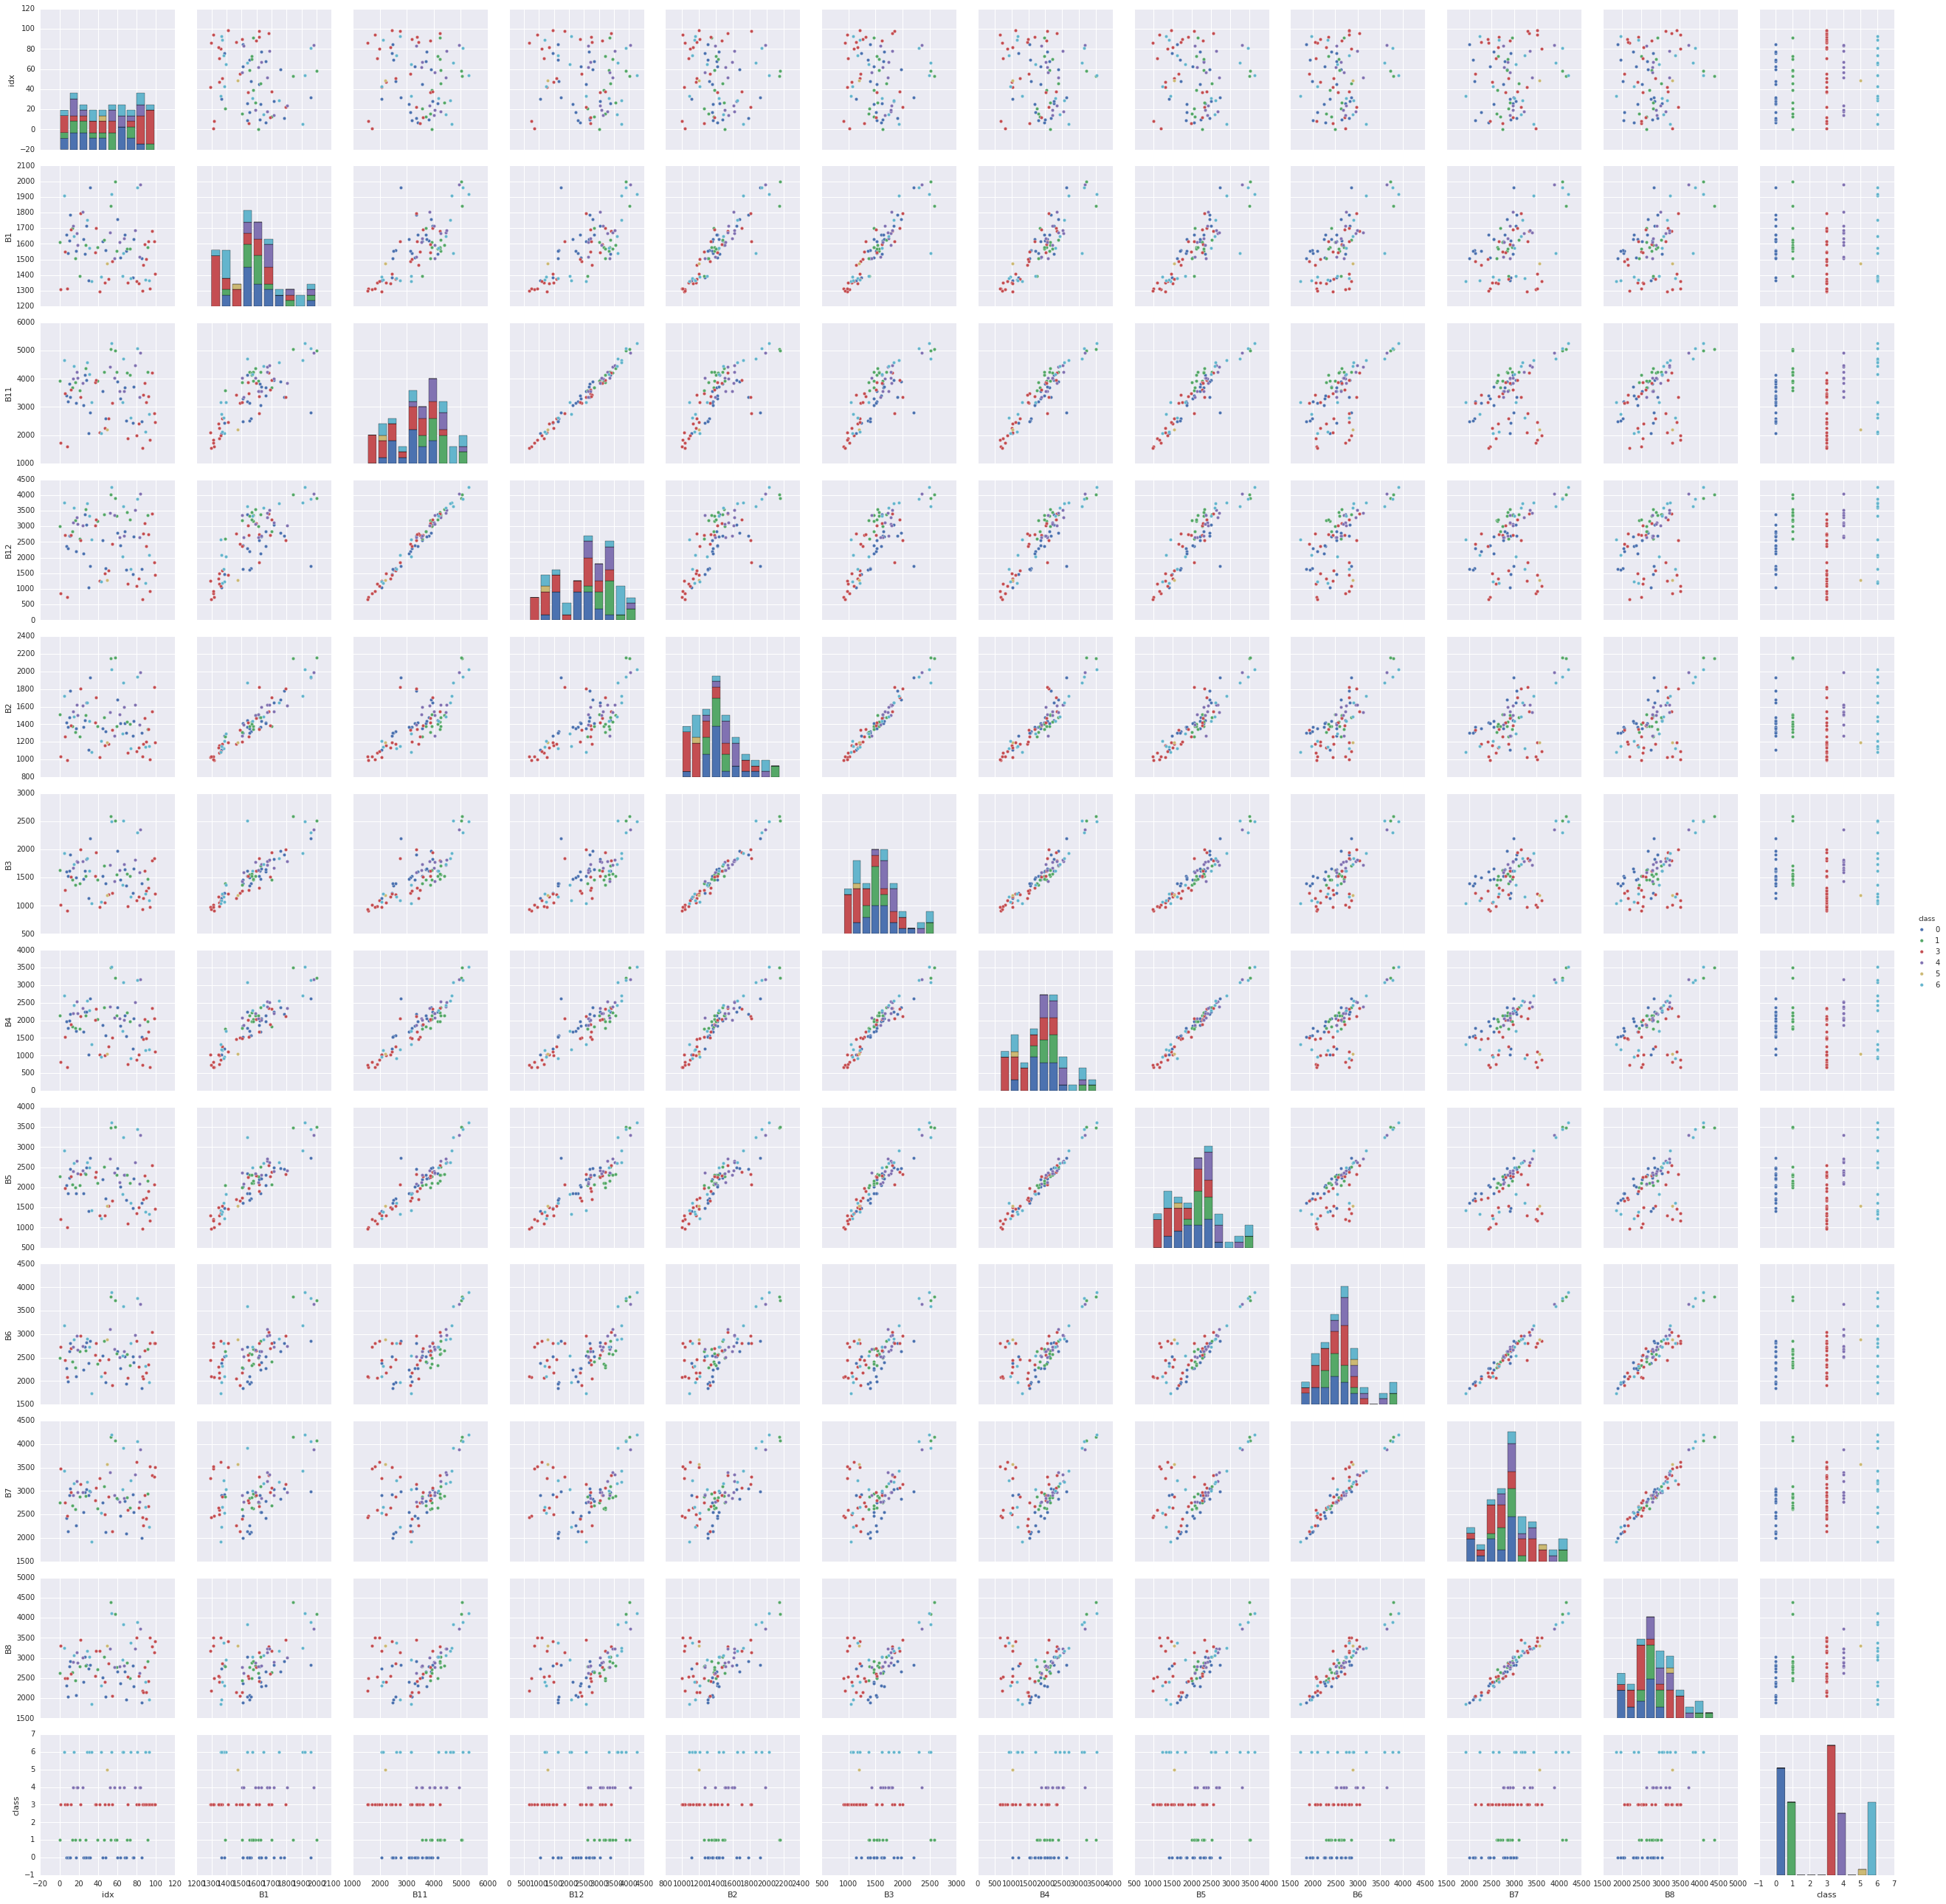

In [7]:
import pandas as pd, seaborn as sns
df = pd.read_csv('Bands_sites_2k.csv')
# cols = 'system_index.Cropland.Longitude.Orchards.Photos.Photos_1.Photos_2.QA10.QA20.QA60.SoilCover.class.desc.grasses.id.invalid.l1.l2.label.other.scrop.shrubs.sid.trees.water'.split('.')
# df = df.drop(cols,1)
# df = df.drop(['B1','B10', 'B11', 'B12', 'B2', 'B8A', 'B9', 'B6', 'B7'], 1)
# df = df.sort_index(axis=1)
sns.pairplot(df, hue="class", size=3)
# df = df.loc[df['croptype'] == 'Barley/Wheat']
# sns.pairplot(df, hue="pcrop", size=3)

plt.suptitle('Tunisia, March-2016')

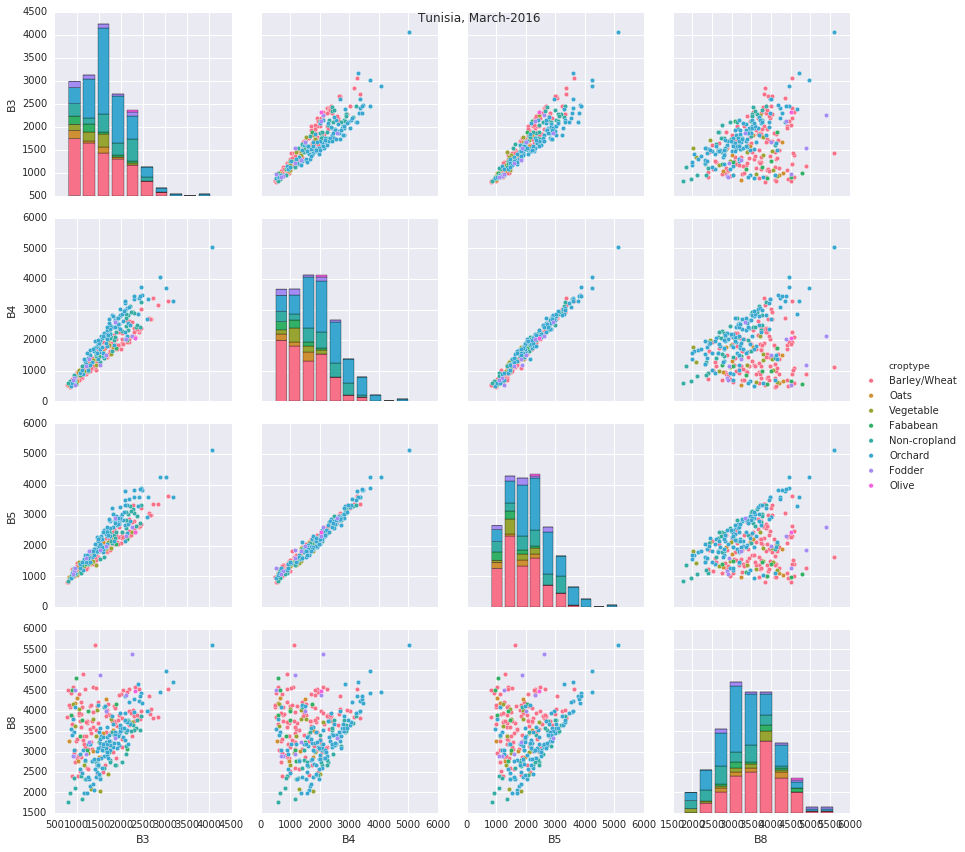

In [22]:
import pandas as pd, seaborn as sns
df = pd.read_csv('tun_ret_mar.csv')
cols = 'system_index.Cropland.Longitude.Orchards.Photos.Photos_1.Photos_2.QA10.QA20.QA60.SoilCover.class.desc.grasses.id.invalid.l1.l2.label.other.scrop.shrubs.sid.trees.water'.split('.')
df = df.drop(cols,1)
df = df.drop(['B1','B10', 'B11', 'B12', 'B2', 'B8A', 'B9', 'B6', 'B7'], 1)

df = df.sort_index(axis=1)

sns.pairplot(df, hue="croptype", size=3)

# df = df.loc[df['croptype'] == 'Barley/Wheat']
# sns.pairplot(df, hue="pcrop", size=3)

plt.suptitle('Tunisia, March-2016')

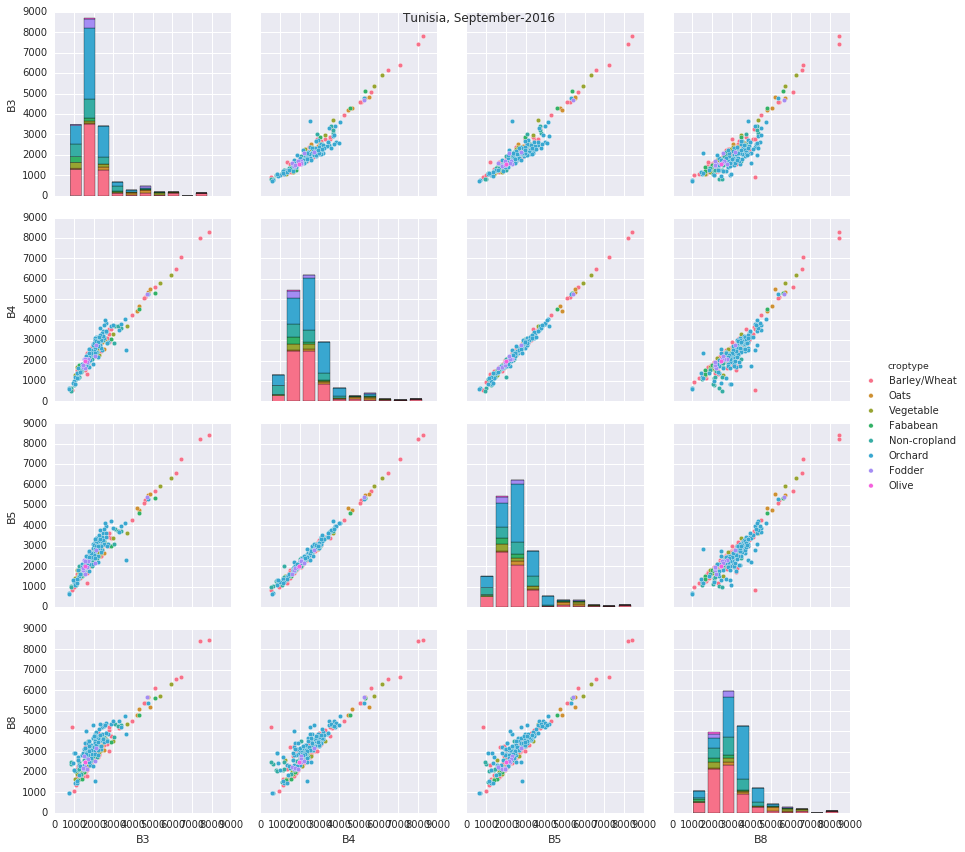

In [18]:
import pandas as pd
df = pd.read_csv('tun_ret_sep.csv')
cols = 'system_index.Cropland.Longitude.Orchards.Photos.Photos_1.Photos_2.QA10.QA20.QA60.SoilCover.class.desc.grasses.id.invalid.l1.l2.label.other.pcrop.scrop.shrubs.sid.trees.water'.split('.')
df = df.drop(cols,1)
df = df.drop(['B1','B10', 'B11', 'B12', 'B2', 'B8A', 'B9', 'B6', 'B7'], 1)
# df = df.loc[df['croptype'] == 'Barley/Wheat']
df = df.sort_index(axis=1)
import seaborn as sns
sns.pairplot(df, hue="croptype", size=3)
plt.suptitle('Tunisia, September-2016')